## Importamos librerias
Paso necesario para trabajar con herramientas de python que nos permiten hacer analisis, graficas, etc.

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt


In [59]:
df = pd.read_csv("20240429_EVALUACION_DOCENTE_2022_PUBL.csv",sep=";") #Creamos dataframe con datos 
df.head(5) # Visualizamos las primeras 5 filas del dataframe para ver los datos

,AGNO_EVAL,RBD,DGV_RBD,NOM_RBD,COD_REG_RBD,COD_PRO_RBD,COD_COM_RBD,NOM_COM_RBD,COD_DEPROV_RBD,NOM_DEPROV_RBD,...,ESTADO_ESTAB,MRUN,DOC_GENERO,DOC_FEC_NAC,NIVEL,PF_PJE,PF_ESC,PF_Cat_Carrera,INSTR_PJE,INSTR_ESC
0,2022,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,1,2385359,2,198104,EA,"2,44",,C,,
1,2022,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,1,5192235,1,195806,EM,"2,63",,B,,
2,2022,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,1,16108824,2,198412,EA,"2,09",,D,,
3,2022,1,9,LICEO POLITECNICO ARICA,15,151,15101,ARICA,151,ARICA,...,1,24060706,2,196207,EA,"2,11",,D,,
4,2022,4,3,LICEO OCTAVIO PALMA PEREZ,15,151,15101,ARICA,151,ARICA,...,1,1825414,2,197205,EM,"2,83",,B,,


## Tarea 1: Limpieza y Preparación de Datos
1.Identificación de valores faltantes: Revisa la base de datos y verifica si hay valores faltantes en las variables clave, como PF_PJE (Puntaje Portafolio) o INSTR_PJE (Puntaje Final en base a resultados en instrumentos). Si encuentras valores faltantes, decide cómo manejarlos (eliminación, imputación, etc.).

2.Normalización de datos: Asegúrate de que todas las variables numéricas estén en el formato correcto (por ejemplo, fechas en formato AAAAMMDD). Si es necesario, convierte las variables categóricas a factores o códigos numéricos.

## Respuesta Tarea 1

Para poder saber si hay valores NaN, verificamos el origen de los valores (PDF adjunto) y comparamos el tipo de dato (obtenido por df.info()). Al realizar la coparación, notamos que hay 1 columna faltante y 2 columnas con valores Nulos. Para las 3 columnas no haremos nada.
Donde se encontraro problemas fue en la columna con nombre "PF_PJE", el cual originalmente almacena "Puntajes de Portafolio" y en el dataframe estaba como objeto, la problematica estaba en transformar de object -> float64. Por la separacion original del csv (separacion: ";") y los valores dentro de la columna en formato float64 (x,yz), aplicaremos la conversion "df['PF_PJE'] = df['PF_PJE'].str.replace(',', '.').astype(float)", donde reemplazamos el tipo de dato a float (.astype(float)) y tendremos cuidado con la separacion del float (.str.replace(',', '.')), por lo cual la columna queda don dtype = float64 y los valores son trabajables e implimibles.

In [58]:
df.info() # Nos sirve para ver tipos de datos y ver si hay datos numericos faltantes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGNO_EVAL       20779 non-null  int64  
 1   RBD             20779 non-null  int64  
 2   DGV_RBD         20779 non-null  int64  
 3   NOM_RBD         20779 non-null  object 
 4   COD_REG_RBD     20779 non-null  int64  
 5   COD_PRO_RBD     20779 non-null  int64  
 6   COD_COM_RBD     20779 non-null  int64  
 7   NOM_COM_RBD     20779 non-null  object 
 8   COD_DEPROV_RBD  20779 non-null  int64  
 9   NOM_DEPROV_RBD  20779 non-null  object 
 10  COD_DEPE        20779 non-null  int64  
 11  COD_DEPE2       20779 non-null  int64  
 12  RURAL_RBD       20779 non-null  int64  
 13  ESTADO_ESTAB    20779 non-null  int64  
 14  MRUN            20779 non-null  int64  
 15  DOC_GENERO      20779 non-null  int64  
 16  DOC_FEC_NAC     20779 non-null  int64  
 17  NIVEL           20779 non-null 

In [60]:
df['PF_PJE'] = df['PF_PJE'].str.replace(',', '.').astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20779 entries, 0 to 20778
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   AGNO_EVAL       20779 non-null  int64  
 1   RBD             20779 non-null  int64  
 2   DGV_RBD         20779 non-null  int64  
 3   NOM_RBD         20779 non-null  object 
 4   COD_REG_RBD     20779 non-null  int64  
 5   COD_PRO_RBD     20779 non-null  int64  
 6   COD_COM_RBD     20779 non-null  int64  
 7   NOM_COM_RBD     20779 non-null  object 
 8   COD_DEPROV_RBD  20779 non-null  int64  
 9   NOM_DEPROV_RBD  20779 non-null  object 
 10  COD_DEPE        20779 non-null  int64  
 11  COD_DEPE2       20779 non-null  int64  
 12  RURAL_RBD       20779 non-null  int64  
 13  ESTADO_ESTAB    20779 non-null  int64  
 14  MRUN            20779 non-null  int64  
 15  DOC_GENERO      20779 non-null  int64  
 16  DOC_FEC_NAC     20779 non-null  int64  
 17  NIVEL           20779 non-null 

## Tarea 2: Análisis Exploratorio de Datos (EDA)

1. Distribución de puntajes: Realiza un análisis de la distribución de los puntajes de los docentes en las variables PF_PJE y INSTR_PJE. Usa histogramas o gráficos de densidad para visualizar la distribución.
2. Comparación por género: Analiza si hay diferencias significativas en los puntajes de evaluación entre docentes de diferentes géneros (DOC_GENERO). Puedes usar pruebas estadísticas como la prueba t o ANOVA, dependiendo de la distribución de los datos.
3. Análisis por región: Agrupa los datos por región (COD_REG_RBD) y compara los puntajes promedio de los docentes en cada región. Visualiza los resultados usando un gráfico de barras o un mapa geográfico.

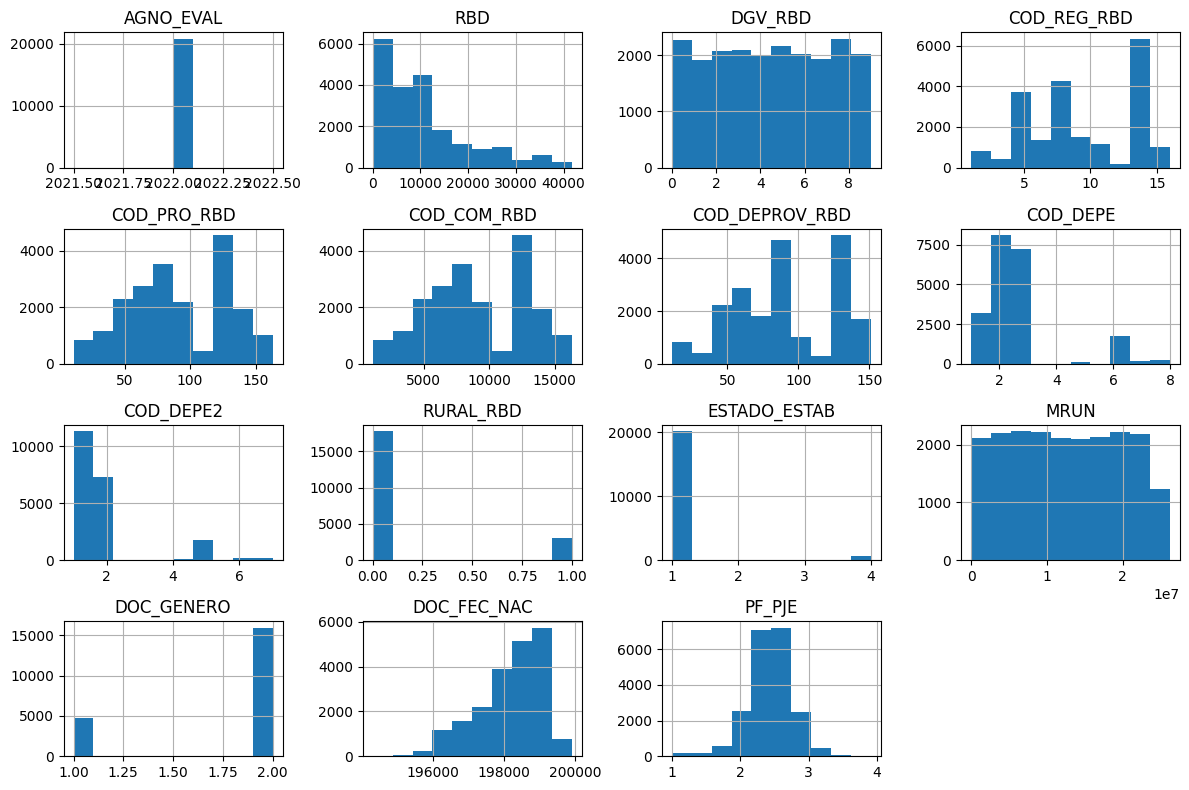

In [62]:
df.hist(bins=10,figsize=(12,8))
plt.tight_layout()
plt.show()